# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

The data set in the experiment is taken from Kaggle that is publicly available as Foreign Exchange Rates 2000-2019. This dataset was originally generated on the Federal Reserve’s Download Data Program. It comprises the exchange rates of 22 countries including the Euro Area for 5217 days.



### Importing libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


### Reading the dataset

In [2]:
data = pd.read_csv(r'D:\Projects_Vaibhav\DeepLearning Projects\LSTM_Projects\Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network\datasets_Foreign_Exchange_Rates_2000_to_2019.csv',index_col= 'Unnamed: 0', na_values='ND')
data.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


### Shape of the dataset

In [3]:
data.shape

(5217, 23)

### Columns in the dataset

In [4]:
data.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

### Plotting Indian exchange rate

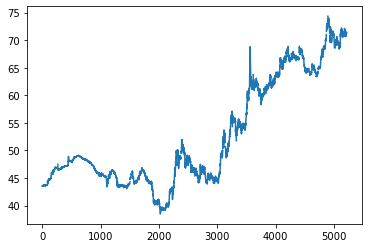

In [5]:
plt.plot(data['INDIA - INDIAN RUPEE/US$'])

### We'll be looking into the India's data

In [6]:
df = data['INDIA - INDIAN RUPEE/US$']
df.head()

0    43.55
1    43.55
2    43.55
3    43.55
4    43.55
Name: INDIA - INDIAN RUPEE/US$, dtype: float64

In [7]:
df.shape

(5217,)

### Filling the missing values

In [8]:
type(df)

pandas.core.series.Series

In [9]:
df.isna().sum()

199

In [10]:
df = df.ffill()

In [11]:
df.isna().sum()

0

### Reshaping of df

In [12]:
ar = np.array(df).reshape((-1, 1))
ar.shape

(5217, 1)

### Normalizing the data

In [13]:
scaler = MinMaxScaler()
ar = scaler.fit_transform(ar)
ar

array([[0.14142259],
       [0.14142259],
       [0.14142259],
       ...,
       [0.91966527],
       [0.91548117],
       [0.91715481]])

### Dividing into training and testing sets

In [14]:
train = ar[:4800]
test = ar[4800:]

train.shape, test.shape

((4800, 1), (417, 1))

In [15]:
train[5]

array([0.14142259])

### Splitting into x and y

In [16]:
def get_data(data):
    data_x, data_y = [], []
    for i in range(len(data)-1):
        data_x.append(data[i:i+1, 0])
        data_y.append(data[i+1,0])
    return np.array(data_x), np.array(data_y)      

In [17]:
# Splitting train data
train_x, train_y = get_data(train)

# Splitting test data
test_x, test_y = get_data(test)

### Processing train and test sets for LSTM model

In [18]:
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

train_x.shape, test_x.shape

((4799, 1, 1), (416, 1, 1))

### Designing the model

In [19]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### Compiling and fitting

In [20]:
model.compile(optimizer='adam', loss='mse')
model.fit(train_x, train_y, epochs=10, batch_size=1)

Epoch 1/10
4799/4799 [==============================] - 12s 2ms/step - loss: 0.0042
Epoch 2/10
4799/4799 [==============================] - 11s 2ms/step - loss: 8.9057e-05
Epoch 3/10
4799/4799 [==============================] - 12s 2ms/step - loss: 6.7346e-05
Epoch 4/10
4799/4799 [==============================] - 12s 2ms/step - loss: 6.6780e-05
Epoch 5/10
4799/4799 [==============================] - 11s 2ms/step - loss: 6.5057e-05
Epoch 6/10
4799/4799 [==============================] - 12s 2ms/step - loss: 6.5040e-05
Epoch 7/10
4799/4799 [==============================] - 12s 2ms/step - loss: 6.4191e-05
Epoch 8/10
4799/4799 [==============================] - 11s 2ms/step - loss: 6.6422e-05
Epoch 9/10
4799/4799 [==============================] - 11s 2ms/step - loss: 6.7797e-05
Epoch 10/10
4799/4799 [==============================] - 11s 2ms/step - loss: 6.4863e-05


### Prediction

In [21]:
scaler.scale_

y_pred = model.predict(test_x)
y_pred[:7]

array([[0.80545896],
       [0.80545896],
       [0.79671025],
       [0.7950697 ],
       [0.7838584 ],
       [0.78549933],
       [0.7874135 ]], dtype=float32)

### Converting the above made prediction back to original type values

In [22]:
y_pred = scaler.inverse_transform(y_pred)
y_pred[:7]

array([[67.355705],
       [67.355705],
       [67.04206 ],
       [66.98325 ],
       [66.58133 ],
       [66.64015 ],
       [66.70878 ]], dtype=float32)

### Processing test data

In [23]:
test_y = np.array(test_y).reshape(-1,1)
test_y.shape

(416, 1)

In [24]:
test_y = scaler.inverse_transform(test_y)
test_y[:7]

array([[67.78],
       [67.46],
       [67.4 ],
       [66.99],
       [67.05],
       [67.12],
       [66.87]])

### Visualizing the results

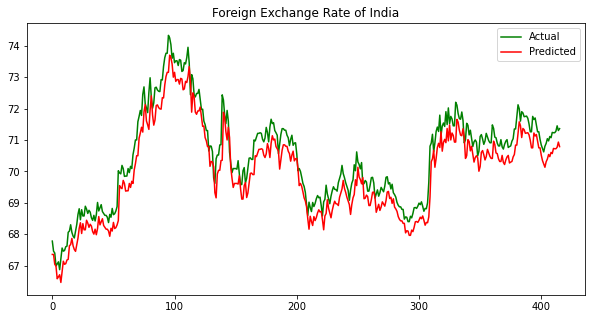

In [25]:
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(test_y , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

### Finding the Mean Squared error

In [26]:
from sklearn.metrics import mean_squared_error
(1-mean_squared_error(test_y, y_pred)) *100

67.00161855401933

# END